In [12]:
import numpy as np
import pandas as pd
classes=[i.split(":")[-1] for i in open("Imagenet_classes").read().replace("}","").split('\n')]
classes=[i.replace("'",'') for i in classes]
serie = pd.Series(classes)

data=pd.read_csv("classes_in_imagenet.csv")

In [2]:
data

,synid,class_name,urls,flickr_urls
0,n00004475,organism,8,6
1,n00005787,benthos,1264,626
2,n00006024,heterotroph,1,0
3,n00006484,cell,1251,628
4,n00007846,person,1242,1138
...,...,...,...,...
21836,n15093137,vitamin P,1233,27
21837,n15093298,vitamin C,1268,824
21838,n15102359,planking,1,1
21839,n15102455,chipboard,1316,474


In [35]:

data["imageNet2012_class_id"]=[int(serie.index[serie.str.contains(i)][0]) if type(i) is str and len(serie.index[serie.str.contains(i)])==1 else None for i in data["class_name"].values]

data.dropna(subset=['imageNet2012_class_id']).to_csv("reduced_classes")

In [26]:
type(data["imageNet2012_class_id"][0])

numpy.float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f2d174a90>,
      dtype=object)

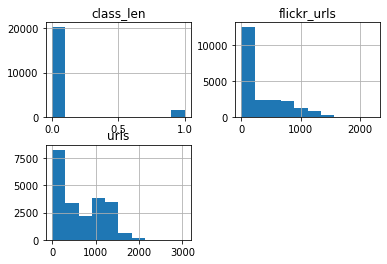

In [26]:
dropna

In [52]:
serie.index[serie.str.contains("canoe")][0]

472

In [62]:
def get_I2012_class(path):
    global serie
    classname=path.split("/")[-2]
    return serie.index[serie.str.contains(classname)][0]


In [84]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data.dataset import random_split, Dataset
datafolder="/home/jpruiz/PycharmProjects/ImageNet-Datasets-Downloader/im" \
           "agenet_images"#/home/jpruiz/PycharmProjects/Memoria/Imagenet/data"


def get get_imageNet():
    datafolder="/home/jpruiz/PycharmProjects/ImageNet-Datasets-Downloader/"#/home/jpruiz/PycharmProjects/Memoria/Imagenet/data"
    
    classes=[i.split(":")[-1] for i in open(datafolder+"Imagenet_classes").read().replace("}","").split('\n')]
    classes=[i.replace("'",'') for i in classes]
    serie = pd.Series(classes)

    
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
    transform= transforms.Compose([
            transforms.RandomSizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ])

    class Dataset_final(Dataset):
        def __init__(self, subset, transform=None):
            self.subset = subset
            self.transform = transform

        def __getitem__(self, index):
            x, y = self.subset[index]
            if self.transform:
                x = self.transform(x)
            return x, y

        def __len__(self):
            return len(self.subset)



    dataset= datasets.ImageFolder(datafolder+"imagenet_images")
    dataset.samples=[(path,get_I2012_class(path)) for (path,i) in dataset.samples]
    l1=int(len(dataset)*0.8)
    lengths = [l1, int(len(dataset)-l1)]
    trainset,testset = random_split(dataset, lengths)
    trainset= Dataset_final(trainset,transform=transform)
    testset= Dataset_final(testset,transform=transform)
    return trainset,testset

    

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
transform= transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])

class Dataset_final(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform
        
    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y
        
    def __len__(self):
        return len(self.subset)



dataset= datasets.ImageFolder(datafolder)
dataset.samples=[(path,get_I2012_class(path)) for (path,i) in dataset.samples]
l1=int(len(dataset)*0.8)
lengths = [l1, int(len(dataset)-l1)]
trainset,testset = random_split(dataset, lengths)
trainset= Dataset_final(trainset,transform=transform)
testset= Dataset_final(testset,transform=transform)


/home/jpruiz/anaconda3/envs/Memoria1/lib/python3.7/site-packages/torchvision/transforms/transforms.py:703: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  warnings.warn("The use of the transforms.RandomSizedCrop transform is deprecated, " +


In [95]:
print(len(trainset))
print(len(testset))


24394
6099


In [81]:


import matplotlib.pyplot as plt


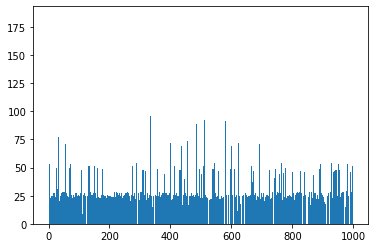

AttributeError: 'Dataset_final' object has no attribute 'samples'

In [85]:

_=plt.hist([i for _,i in dataset.samples],bins=1000)
plt.show()
_=plt.hist([i for _,i in trainset.samples],bins=1000)
_=plt.hist([i for _,i in testset.samples],bins=1000)

In [86]:
trainset,testset = random_split(dataset, lengths)

In [92]:
[i for _,i in trainset]

[229,
 952,
 118,
 722,
 255,
 975,
 430,
 434,
 557,
 27,
 298,
 160,
 774,
 541,
 366,
 951,
 921,
 652,
 822,
 334,
 257,
 59,
 28,
 386,
 150,
 204,
 836,
 549,
 131,
 41,
 265,
 460,
 446,
 714,
 104,
 858,
 258,
 767,
 106,
 550,
 239,
 294,
 956,
 950,
 346,
 433,
 802,
 461,
 941,
 559,
 916,
 253,
 712,
 66,
 54,
 328,
 75,
 400,
 745,
 30,
 636,
 724,
 684,
 926,
 333,
 256,
 691,
 664,
 424,
 982,
 604,
 176,
 482,
 827,
 116,
 610,
 128,
 755,
 354,
 444,
 974,
 583,
 760,
 574,
 638,
 533,
 918,
 929,
 325,
 856,
 902,
 382,
 336,
 546,
 639,
 366,
 864,
 120,
 180,
 450,
 982,
 419,
 541,
 550,
 941,
 745,
 868,
 833,
 837,
 465,
 257,
 423,
 87,
 538,
 878,
 690,
 922,
 440,
 883,
 779,
 914,
 107,
 148,
 319,
 900,
 864,
 227,
 881,
 438,
 206,
 610,
 150,
 469,
 806,
 888,
 749,
 329,
 955,
 464,
 827,
 54,
 211,
 608,
 506,
 778,
 723,
 422,
 194,
 403,
 264,
 938,
 553,
 102,
 886,
 619,
 68,
 863,
 512,
 396,
 810,
 664,
 534,
 596,
 756,
 798,
 89,
 527,
 46,
 609,